In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd

pumpkins = pd.read_csv('US-pumpkins.csv', parse_dates=['Date'])

# remove row if Date is below 2016
pumpkins = pumpkins[pumpkins['Date'] >= '2016-01-01']

# remove rows where package doesn't contain "inch bin"
pumpkins = pumpkins[pumpkins['Package'].str.contains('inch bins')]

pumpkins["Package"].value_counts()
# normalize price per pound



In [ ]:
dayOfYear = pumpkins["Date"].dt.strftime("%j").astype(int)
# create a column for day of year
pumpkins["DayOfYear"] = dayOfYear

In [ ]:
y_prices = pumpkins.drop([c for c in pumpkins.columns if c not in ["High Price"] and c not in ["Low Price"]], axis=1).mean(axis=1)
pumpkins["Price"] = y_prices

In [ ]:
new_columns = ['Price', 'DayOfYear', 'Variety', 'Package', 'Item Size'] #put names of columns to keep here
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

In [ ]:
# bring 24 inch bins to 36 inch bins
pumpkins.loc[pumpkins['Package'].str.contains('36 inch bins'), 'Price'] = y_prices/(36/24)


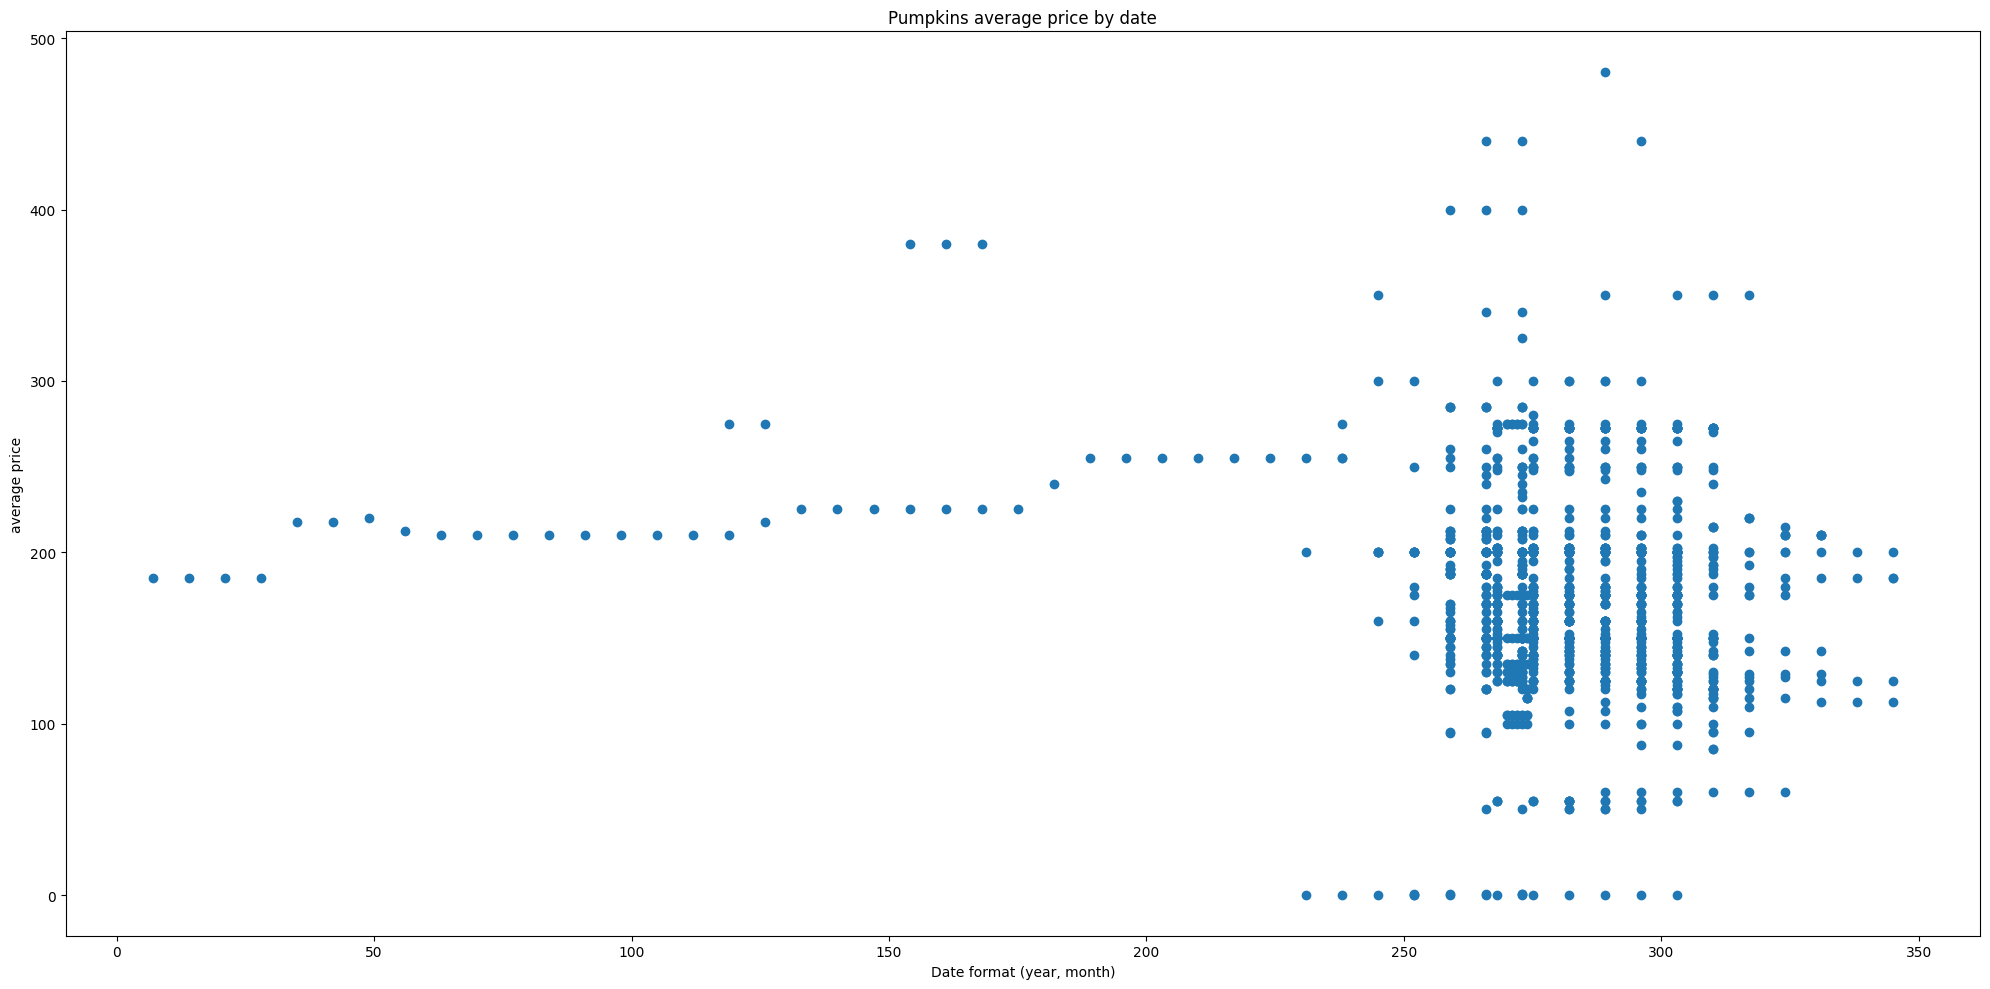

In [ ]:
# resize graph
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
# plot
plt.scatter(dayOfYear, y_prices)
plt.title('Pumpkins average price by date')
plt.xlabel('Date format (year, month)')
plt.ylabel('average price')
plt.tight_layout()
plt.show()
f.savefig("img/pumpkins-2.png")

In [ ]:
# X = new_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
# y = new_pumpkins['Price']
X_dates = dayOfYear.to_numpy().reshape(-1,1)
y_prices = y_prices.to_numpy().reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dates, y_prices, test_size=0.3)


In [ ]:
lin_reg = LinearRegression().fit(X_train,y_train)

In [ ]:
#Seperating input and output
# X = pd.get_dummies(pumpkins['Item Size']).join(pd.get_dummies(pumpkins['Variety']).join(pumpkins["DayOfYear"]))
X = pd.get_dummies(pumpkins['Variety']).join(pumpkins["DayOfYear"])
y = y_prices

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
pipeline = LinearRegression().fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {rmse:3.3} ({rmse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 49.0 (28.3%)
Model determination:  0.31035370079127167
